In [2]:
%pip install pandas 
import pandas as pd


Note: you may need to restart the kernel to use updated packages.


In [3]:
df = pd.read_csv("fct_invoice.csv")
df

,invoice_no,customer_id,category,quantity,price,payment_method,invoice_date,shopping_mall
0,I138884,229,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon
1,I317333,3433,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul
2,I127801,644,Clothing,1,300.08,Cash,9/11/2021,Metrocity
3,I173702,4900,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM
4,I337046,1089,Books,4,60.60,Cash,24/10/2021,Kanyon
...,...,...,...,...,...,...,...,...
99452,I219422,2344,Souvenir,5,58.65,Credit Card,21/09/2022,Kanyon
99453,I325143,172,Food & Beverage,2,10.46,Cash,22/09/2021,Forum Istanbul
99454,I824010,425,Food & Beverage,2,10.46,Debit Card,28/03/2021,Metrocity
99455,I702964,577,Technology,4,4200.00,Cash,16/03/2021,Istinye Park


In [4]:
df.columns

Index(['invoice_no', 'customer_id', 'category', 'quantity', 'price',
       'payment_method', 'invoice_date', 'shopping_mall'],
      dtype='object')

In [6]:
import json

#Loading up the JSON file
with open("dim_customer.json") as p:
	data = json.load(p)
	dp=pd.DataFrame(data)

# type(data)

# data["age"]


In [7]:
dp.columns

Index(['age', 'first_name', 'gender', 'id', 'last_name'], dtype='object')

In [ ]:
# IN-CLASS ACTIVITY

In [15]:

#Describing the data only (using only single column):
#1. How many unique customers are there in the dataset? Can you identify any frequent or loyal customers?
unique_customers = df["customer_id"].unique()
print(len(unique_customers))
print(df["customer_id"].value_counts()[0:10])
print("----")

#2. What are the different categories of products available? How many unique categories are there?
different_categories = df["category"].unique()
print(different_categories)
print("number of unique categories:", len(different_categories))
print("----")

#3. What are the different payment methods used by customers? Which payment methods are the most popular?
payment_methods = df["payment_method"]
credit_card = len(df.loc[df["payment_method"]=="Credit Card"])
debit_card = len(df.loc[df["payment_method"]=="Debit Card"])
cash = len(df.loc[df["payment_method"]=="Cash"])
print("Credit Card:", credit_card)
print("Debit Card:", debit_card)
print("Cash:", cash)
print("TOTAL:", int(credit_card + debit_card + cash))
print("----")

#4. How is the data distributed across different invoice dates? Are there any seasonal trends or patterns?
# **

#5. Which shopping malls are included in the dataset? Are there any malls that contribute more sales than others?
shopping_malls = df["shopping_mall"].unique()
print(shopping_malls)

df["total_revenues"] = df["quantity"] * df["price"]
df.head()

df.groupby("shopping_mall").sum()["total_revenues"]


5191
50    128
7     121
4     117
80    113
74    112
61    112
75    110
53    110
26    109
45    109
Name: customer_id, dtype: int64
----
['Clothing' 'Shoes' 'Books' 'Cosmetics' 'Food & Beverage' 'Toys'
 'Technology' 'Souvenir']
number of unique categories: 8
----
Credit Card: 34931
Debit Card: 20079
Cash: 44447
TOTAL: 99457
----
['Kanyon' 'Forum Istanbul' 'Metrocity' 'Metropol AVM' 'Istinye Park'
 'Mall of Istanbul' 'Emaar Square Mall' 'Cevahir AVM' 'Viaport Outlet'
 'Zorlu Center']


/var/folders/g1/cgdvqfl50_58xxxyz04jjxs80000gn/T/ipykernel_76373/1677041013.py:35: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby("shopping_mall").sum()["total_revenues"]


shopping_mall
Cevahir AVM          12645138.20
Emaar Square Mall    12406100.29
Forum Istanbul       12303921.24
Istinye Park         24618827.68
Kanyon               50554231.10
Mall of Istanbul     50872481.68
Metrocity            37302787.33
Metropol AVM         25379913.19
Viaport Outlet       12521339.72
Zorlu Center         12901053.82
Name: total_revenues, dtype: float64

In [16]:
#Using two or more columns:
#1. How many males or females are shopping in the particular shopping mall
merged_df = pd.merge(df[["shopping_mall"]], dp[["age","gender"]],left_on = df["customer_id"],right_on =[dp["id"]])

counts = merged_df.groupby('shopping_mall')['gender'].value_counts()

print(counts)


shopping_mall      gender
Cevahir AVM        F          2594
                   M          2397
Emaar Square Mall  F          2460
                   M          2351
Forum Istanbul     F          2640
                   M          2307
Istinye Park       F          5016
                   M          4765
Kanyon             F         10244
                   M          9579
Mall of Istanbul   F         10233
                   M          9710
Metrocity          F          7756
                   M          7255
Metropol AVM       F          5230
                   M          4931
Viaport Outlet     F          2548
                   M          2366
Zorlu Center       F          2665
                   M          2410
Name: gender, dtype: int64


In [ ]:
new_df = df[["customer_id","shopping_mall"]].copy()
new_df["id"] = new_df["customer_id"]

new_df = new_df.merge(dp, how = "left")
new_df.head()

,customer_id,shopping_mall,id,age,first_name,gender,last_name
0,229,Kanyon,229,NaN,William,M,Anderson
1,3433,Forum Istanbul,3433,34.0,Danielle,F,Rivera
2,644,Metrocity,644,46.0,Christopher,M,Stephens
3,4900,Metropol AVM,4900,46.0,Laura,F,Kelly
4,1089,Kanyon,1089,NaN,Richard,M,Rhodes


In [19]:
#2. Demographics related to price / quantity / category of items being bought
df['total_revenues']=df['quantity'] * df['price']

merged_df = pd.merge(df[['price','category','quantity','total_revenues']], dp[['age','gender']], left_on=df['customer_id'],right_on=dp['id'])


counts = merged_df.groupby('category')['gender'].value_counts()
print(counts)



category         gender
Books            F          2573
                 M          2408
Clothing         F         17808
                 M         16679
Cosmetics        F          7785
                 M          7312
Food & Beverage  F          7696
                 M          7080
Shoes            F          5167
                 M          4867
Souvenir         F          2571
                 M          2428
Technology       F          2533
                 M          2463
Toys             F          5253
                 M          4834
Name: gender, dtype: int64


In [ ]:
#3. Category and payment method
frequency_table = df.groupby('category')['payment_method'].value_counts().reset_index(name='frequency')

print(frequency_table)

           category payment_method  frequency
0             Books           Cash       2268
1             Books    Credit Card       1696
2             Books     Debit Card       1017
3          Clothing           Cash      15456
4          Clothing    Credit Card      12025
5          Clothing     Debit Card       7006
6         Cosmetics           Cash       6674
7         Cosmetics    Credit Card       5336
8         Cosmetics     Debit Card       3087
9   Food & Beverage           Cash       6587
10  Food & Beverage    Credit Card       5250
11  Food & Beverage     Debit Card       2939
12            Shoes           Cash       4474
13            Shoes    Credit Card       3553
14            Shoes     Debit Card       2007
15         Souvenir           Cash       2211
16         Souvenir    Credit Card       1770
17         Souvenir     Debit Card       1018
18       Technology           Cash       2235
19       Technology    Credit Card       1753
20       Technology     Debit Card

In [ ]:
#4. Category and shopping mall
frequency_table = df.groupby('category')['shopping_mall'].value_counts().reset_index(name='frequency')

print(frequency_table)

   category      shopping_mall  frequency
0     Books   Mall of Istanbul       1025
1     Books             Kanyon       1013
2     Books          Metrocity        752
3     Books       Metropol AVM        476
4     Books       Istinye Park        462
..      ...                ...        ...
75     Toys     Forum Istanbul        531
76     Toys     Viaport Outlet        515
77     Toys        Cevahir AVM        514
78     Toys       Zorlu Center        513
79     Toys  Emaar Square Mall        464

[80 rows x 3 columns]


In [ ]:
#SUBMISSION

In [ ]:
#Easy
#1. How many unique customers are in the dataset?
unique_customers = df["customer_id"].unique()
print(len(unique_customers))
print(df["customer_id"].value_counts()[0:10])
print("----")

#2. What are the different categories of products available? How many unique categories are there?
different_categories = df["category"].unique()
print(different_categories)
print("number of unique categories:", len(different_categories))
print("----")

#3. Which payment method is the most popular? How many times was it used?
payment_methods = df["payment_method"]
credit_card = len(df.loc[df["payment_method"]=="Credit Card"])
debit_card = len(df.loc[df["payment_method"]=="Debit Card"])
cash = len(df.loc[df["payment_method"]=="Cash"])
print("Credit Card:", credit_card)
print("Debit Card:", debit_card)
print("Cash:", cash)
print("TOTAL:", int(credit_card + debit_card + cash))

5191
customer_id
50    128
7     121
4     117
80    113
74    112
61    112
75    110
53    110
26    109
45    109
Name: count, dtype: int64
----
['Clothing' 'Shoes' 'Books' 'Cosmetics' 'Food & Beverage' 'Toys'
 'Technology' 'Souvenir']
number of unique categories: 8
----
Credit Card: 34931
Debit Card: 20079
Cash: 44447
TOTAL: 99457


category
Clothing      1.139968e+08
Shoes         6.655345e+07
Technology    5.786235e+07
Name: total_revenues, dtype: float64
----
Total sales attributed to customers over 45: 82039768.15
----


/var/folders/g1/cgdvqfl50_58xxxyz04jjxs80000gn/T/ipykernel_76373/3802681665.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  category_sales = df.groupby("category").sum()["total_revenues"]


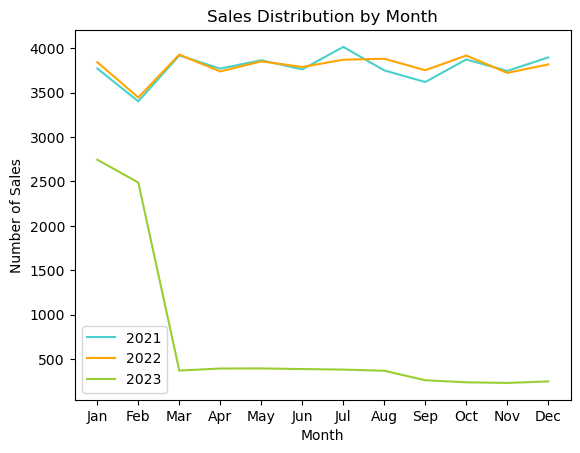

In [33]:
#Medium
#1. What are the three most popular categories, by total sales?
category_sales = df.groupby("category").sum()["total_revenues"]
top_three_categories = category_sales.nlargest(3)
print(top_three_categories)
print("----")

#2. What are the total sales attributed to customers over the age of 45?
merged_df = pd.merge(df[["total_revenues"]], dp[["age"]],left_on = df["customer_id"],right_on =[dp["id"]])
filtered_df = merged_df[merged_df['age'] > 45]
total_sales_over_45 = filtered_df['total_revenues'].sum()
print("Total sales attributed to customers over 45:", total_sales_over_45)
print("----")

#3. How is the data distributed across different invoice dates? Are there any seasonal trends or patterns? (Use a graph for this.)
import matplotlib.pyplot as plt
import calendar

df['invoice_date'] = pd.to_datetime(df['invoice_date'])
df['year'] = df['invoice_date'].dt.year
df['month'] = df['invoice_date'].dt.month

data_by_year_month = df.groupby(['year', 'month']).size().reset_index(name='count')

years = [2021, 2022, 2023]
filtered_data = data_by_year_month[data_by_year_month['year'].isin(years)]
colors = ['mediumturquoise', 'orange', 'yellowgreen']

for i, year in enumerate(years):
    year_data = filtered_data[filtered_data['year'] == year]
    month_labels = [calendar.month_abbr[month] for month in year_data['month']]
    plt.plot(month_labels, year_data['count'], color=colors[i], label=str(year))

# Customize the graph
plt.title('Sales Distribution by Month')
plt.xlabel('Month')
plt.ylabel('Number of Sales')
plt.legend()

# Display the graph
plt.show()

In [45]:
#Hard
#1. Create a pivot table showing the breakdown of sales across these dimensions, in this order: category, decade age range (e.g., 10-19, 20-29, and so forth).
# Create a new column for decade age range
import numpy as np

merged_df = pd.merge(df[["total_revenues","category"]], dp[["age"]],left_on = df["customer_id"],right_on =[dp["id"]])
merged_df['decade_age_range'] = merged_df['age'] // 10 * 10

# Create a pivot table showing the breakdown of sales
pivot_table = pd.pivot_table(merged_df, values='total_revenues', index='category', columns='decade_age_range', aggfunc=np.sum)

# Print the pivot table
print(pivot_table)

decade_age_range        10.0         20.0         30.0         40.0  \
category                                                              
Books               12801.75     79461.75     84143.10     87203.40   
Clothing          1927413.84  10250732.80  11354126.96  11215189.92   
Cosmetics          109619.36    605915.32    723544.70    665034.96   
Food & Beverage     13582.31     73491.96     87246.86     89553.29   
Shoes              993281.35   5924878.24   7200839.66   7025590.02   
Souvenir            12375.15     54943.32     64092.72     66391.80   
Technology        1129800.00   5261550.00   6159300.00   5954550.00   
Toys                60426.24    385100.80    420582.40    390906.88   

decade_age_range         50.0         60.0        70.0        80.0  
category                                                            
Books                74962.20     80476.80    54827.85    26664.00  
Clothing          10321851.76  10660642.08  7769371.28  4493698.00  
Cosmetics    